## III -Exploratory Analysis
### C - Hospital Value-Based Purchasing (HVBP) Table
#### 1) Importing libraries

In [1]:
import folium
from folium import plugins
import pandas.io.sql as sqlio
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
print("Imported all the required libraries")

Imported all the required libraries


#### 2) Querying data from the server

In [2]:
sql = '''
SELECT * FROM "HVBP";'''
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "83.212.82.56",
    port = "5432",

    database = "dap_medicare")
    hvbp_df = sqlio.read_sql_query(sql, dbConnection) 
except (Exception, psycopg2.Error) as dbError:
    print ("Error while fetching db hvbp:", dbError)
finally:
    if(dbConnection): dbConnection.close()
hvbp_df.head()

,provider_number,hospital_name,address,city,state,zip_code,county_name,mort_30_ami_achievement_threshold,mort_30_ami_benchmark,mort_30_ami_baseline_rate,...,mort_30_pn_measure_score,comp_hip_knee_achievement_threshold,comp_hip_knee_benchmark,comp_hip_knee_baseline_rate,comp_hip_knee_performance_rate,comp_hip_knee_achievement_points,comp_hip_knee_improvement_points,comp_hip_knee_measure_score,latitude,longitude
0,50026,GROSSMONT HOSPITAL,5555 GROSSMONT CENTER DRIVE BOX 58,LA MESA,CA,91942,San Diego,0.853715,0.875869,0.837234,...,9,0.032229,0.023178,0.027022,0.018553,10,9,10,32.779435,-117.009178
1,50103,WHITE MEMORIAL MEDICAL CENTER,1720 E CESAR AVENUE,LOS ANGELES,CA,90033,Los Angeles,0.853715,0.875869,0.862837,...,10,0.032229,0.023178,0.034845,0.020537,10,9,10,NaN,NaN
2,50224,HOAG MEMORIAL HOSPITAL PRESBYTERIAN,ONE HOAG DRIVE,NEWPORT BEACH,CA,92663,Orange,0.853715,0.875869,0.856289,...,10,0.032229,0.023178,0.037973,0.026753,7,8,7,NaN,NaN
3,60020,"PARKVIEW MEDICAL CENTER, INC",400 W 16TH ST,PUEBLO,CO,81003,Pueblo,0.853715,0.875869,0.856647,...,8,0.032229,0.023178,0.037675,0.038362,0,0,0,38.281678,-104.612123
4,150169,COMMUNITY HOSPITAL NORTH,7150 CLEARVISTA DR,INDIANAPOLIS,IN,46256,Marion,0.853715,0.875869,0.827037,...,3,0.032229,0.023178,0.032862,0.031087,2,1,2,39.900033,-86.043072


#### 3) Descriptive statistical analysis
i) Shape of the hvbp data frame

In [3]:
print ('data dimensions:', hvbp_df.shape)

data dimensions: (2731, 37)


ii) List the data types for each column

In [4]:
hvbp_df.dtypes


provider_number                          int64
hospital_name                           object
address                                 object
city                                    object
state                                   object
zip_code                                 int64
county_name                             object
mort_30_ami_achievement_threshold      float64
mort_30_ami_benchmark                  float64
mort_30_ami_baseline_rate              float64
mort_30_ami_performance_rate           float64
mort_30_ami_achievement_points           int64
mort_30_ami_improvement_points           int64
mort_30_ami_measure_score                int64
mort_30_hf_achievement_threshold       float64
mort_30_hf_benchmark                   float64
mort_30_hf_baseline_rate               float64
mort_30_hf_performance_rate            float64
mort_30_hf_achievement_points            int64
mort_30_hf_improvement_points            int64
mort_30_hf_measure_score                 int64
mort_30_pn_ac

iii) Summary of all columns

In [5]:
print("All numerical Columns")
hvbp_df.describe()

All numerical Columns


,provider_number,zip_code,mort_30_ami_achievement_threshold,mort_30_ami_benchmark,mort_30_ami_baseline_rate,mort_30_ami_performance_rate,mort_30_ami_achievement_points,mort_30_ami_improvement_points,mort_30_ami_measure_score,mort_30_hf_achievement_threshold,...,mort_30_pn_measure_score,comp_hip_knee_achievement_threshold,comp_hip_knee_benchmark,comp_hip_knee_baseline_rate,comp_hip_knee_performance_rate,comp_hip_knee_achievement_points,comp_hip_knee_improvement_points,comp_hip_knee_measure_score,latitude,longitude
count,2731.000000,2731.000000,2.731000e+03,2.731000e+03,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2.731000e+03,...,2731.000000,2.731000e+03,2.731000e+03,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2584.000000,2584.000000
mean,256912.403149,51608.730502,8.537150e-01,8.758690e-01,0.853883,0.872044,7.246796,6.344196,7.562431,8.810900e-01,...,6.172098,3.222900e-02,2.317800e-02,0.032641,0.025535,6.777005,6.224826,7.112779,37.450753,-91.930806
std,159049.146717,28102.463142,2.776066e-15,2.465146e-14,0.012806,0.009493,2.716633,2.798250,2.398878,6.440473e-15,...,3.095851,7.078968e-16,1.047965e-15,0.006178,0.005260,3.222358,3.141006,2.941509,5.184017,15.465319
min,10001.000000,1040.000000,8.537150e-01,8.758690e-01,0.799266,0.831566,0.000000,0.000000,0.000000,8.810900e-01,...,0.000000,3.222900e-02,2.317800e-02,0.015816,0.012587,0.000000,0.000000,0.000000,19.519237,-159.366198
25%,110026.000000,30068.000000,8.537150e-01,8.758690e-01,0.845970,0.866936,6.000000,5.000000,6.000000,8.810900e-01,...,4.000000,3.222900e-02,2.317800e-02,0.028372,0.022319,5.000000,5.000000,6.000000,33.791066,-97.512445
50%,250050.000000,48201.000000,8.537150e-01,8.758690e-01,0.854780,0.872083,8.000000,7.000000,8.000000,8.810900e-01,...,7.000000,3.222900e-02,2.317800e-02,0.031803,0.025042,8.000000,7.000000,8.000000,37.973732,-87.683200
75%,390065.500000,76190.500000,8.537150e-01,8.758690e-01,0.862395,0.877423,10.000000,9.000000,10.000000,8.810900e-01,...,9.000000,3.222900e-02,2.317800e-02,0.035979,0.027884,10.000000,9.000000,10.000000,41.294664,-81.192737
max,670122.000000,99801.000000,8.537150e-01,8.758690e-01,0.907917,0.911739,10.000000,9.000000,10.000000,8.810900e-01,...,10.000000,3.222900e-02,2.317800e-02,0.064550,0.107465,10.000000,9.000000,10.000000,64.831407,-68.009639


In [6]:
print("All categorical Columns")
hvbp_df.describe(include=['object'])

All categorical Columns


,hospital_name,address,city,state,county_name
count,2731,2731,2731,2731,2731
unique,2644,2724,1716,50,944
top,ST JOSEPH HOSPITAL,100 MEDICAL CENTER DRIVE,CHICAGO,CA,Los Angeles
freq,7,3,22,269,71


iv) Summary of columns containg improvement and achievement points and measures for diffferent features

In [7]:
print("Creating a new data frame contaning only improvement and achievement points and measures")
features = ['mort_30_ami_achievement_points','mort_30_ami_improvement_points','mort_30_ami_measure_score',
            'mort_30_hf_achievement_points','mort_30_hf_improvement_points','mort_30_hf_measure_score',
            'mort_30_pn_achievement_points','mort_30_pn_improvement_points','mort_30_pn_measure_score',
            'comp_hip_knee_achievement_points','comp_hip_knee_improvement_points','comp_hip_knee_measure_score']
hvbp_df_m = hvbp_df[features]
# keeping common part of column name till index 13 to use it later for histogram title
hvbp_df_m.rename(columns={'mort_30_ami_achievement_points'  :   'achieve_point_ami',
                          'mort_30_ami_improvement_points'  :   'improve_point_ami',
                          'mort_30_ami_measure_score'       :   'measure_score_ami',
                          'mort_30_hf_achievement_points'   :   'achieve_point_hf',
                          'mort_30_hf_improvement_points'   :   'improve_point_hf',
                          'mort_30_hf_measure_score'        :   'measure_score_hf',
                          'mort_30_pn_achievement_points'   :   'achieve_point_pn',
                          'mort_30_pn_improvement_points'   :   'improve_point_pn',
                          'mort_30_pn_measure_score'        :   'measure_score_pn',
                          'comp_hip_knee_achievement_points':   'achieve_point_hip_knee',
                          'comp_hip_knee_improvement_points':   'improve_point_hip_knee',
                          'comp_hip_knee_measure_score'     :   'measure_score_hip_knee'}, inplace=True)
hvbp_df_m.head()

Creating a new data frame contaning only improvement and achievement points and measures


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,achieve_point_ami,improve_point_ami,measure_score_ami,achieve_point_hf,improve_point_hf,measure_score_hf,achieve_point_pn,improve_point_pn,measure_score_pn,achieve_point_hip_knee,improve_point_hip_knee,measure_score_hip_knee
0,8,8,8,10,9,10,9,9,9,10,9,10
1,10,9,10,9,0,9,10,9,10,10,9,10
2,10,9,10,10,9,10,10,9,10,7,8,7
3,1,0,1,2,5,5,8,4,8,0,0,0
4,1,5,5,0,3,3,3,0,3,2,1,2


In [8]:
print("Summary of hvbp_df_m")
hvbp_df_m.describe()

Summary of hvbp_df_m


,achieve_point_ami,improve_point_ami,measure_score_ami,achieve_point_hf,improve_point_hf,measure_score_hf,achieve_point_pn,improve_point_pn,measure_score_pn,achieve_point_hip_knee,improve_point_hip_knee,measure_score_hip_knee
count,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000
mean,7.246796,6.344196,7.562431,2.930428,2.448187,3.406078,5.623947,5.055291,6.172098,6.777005,6.224826,7.112779
std,2.716633,2.798250,2.398878,3.325492,3.005698,3.245095,3.458005,3.369474,3.095851,3.222358,3.141006,2.941509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,5.000000,6.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,5.000000,5.000000,6.000000
50%,8.000000,7.000000,8.000000,2.000000,1.000000,3.000000,6.000000,6.000000,7.000000,8.000000,7.000000,8.000000
75%,10.000000,9.000000,10.000000,5.000000,4.000000,6.000000,9.000000,9.000000,9.000000,10.000000,9.000000,10.000000
max,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000


v) Finding correlations between columns of new data frame hvbp_df_m

In [9]:
hvbp_df_m.corr()

,achieve_point_ami,improve_point_ami,measure_score_ami,achieve_point_hf,improve_point_hf,measure_score_hf,achieve_point_pn,improve_point_pn,measure_score_pn,achieve_point_hip_knee,improve_point_hip_knee,measure_score_hip_knee
achieve_point_ami,1.000000,0.729198,0.961827,0.269871,0.172574,0.246035,0.192212,0.079623,0.159886,0.013319,0.014358,0.010909
improve_point_ami,0.729198,1.000000,0.800484,0.135033,0.124763,0.129701,0.073268,0.052526,0.065760,-0.003184,-0.010975,-0.007610
measure_score_ami,0.961827,0.800484,1.000000,0.247899,0.171589,0.231144,0.181338,0.090004,0.157915,0.016231,0.019138,0.014108
achieve_point_hf,0.269871,0.135033,0.247899,1.000000,0.741444,0.951843,0.351201,0.198676,0.316399,-0.022129,-0.013196,-0.019194
improve_point_hf,0.172574,0.124763,0.171589,0.741444,1.000000,0.832850,0.207236,0.183928,0.212507,-0.020311,-0.013083,-0.019350
measure_score_hf,0.246035,0.129701,0.231144,0.951843,0.832850,1.000000,0.315067,0.204106,0.299387,-0.023074,-0.010506,-0.019650
achieve_point_pn,0.192212,0.073268,0.181338,0.351201,0.207236,0.315067,1.000000,0.749183,0.946924,0.032248,0.028089,0.033953
improve_point_pn,0.079623,0.052526,0.090004,0.198676,0.183928,0.204106,0.749183,1.000000,0.841572,0.021310,0.030009,0.024095
measure_score_pn,0.159886,0.065760,0.157915,0.316399,0.212507,0.299387,0.946924,0.841572,1.000000,0.028927,0.025854,0.028800
achieve_point_hip_knee,0.013319,-0.003184,0.016231,-0.022129,-0.020311,-0.023074,0.032248,0.021310,0.028927,1.000000,0.803644,0.962635


#### 4) Visualization
i) Checking distribution of points and measures using box-plot

[Text(0, 0, 'achieve_point_ami'),
 Text(0, 0, 'improve_point_ami'),
 Text(0, 0, 'measure_score_ami'),
 Text(0, 0, 'achieve_point_hf'),
 Text(0, 0, 'improve_point_hf'),
 Text(0, 0, 'measure_score_hf'),
 Text(0, 0, 'achieve_point_pn'),
 Text(0, 0, 'improve_point_pn'),
 Text(0, 0, 'measure_score_pn'),
 Text(0, 0, 'achieve_point_hip_knee'),
 Text(0, 0, 'improve_point_hip_knee'),
 Text(0, 0, 'measure_score_hip_knee')]

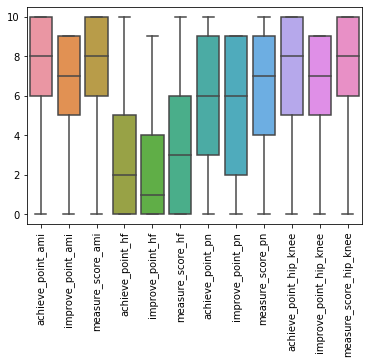

In [10]:
box_plot = sns.boxplot(data=hvbp_df_m)
box_plot.set_xticklabels(box_plot.get_xticklabels(),rotation=90)

#### it can be inferred that all the plotted points/scores have fairly normal distribution except improve point hf which may have a slightly skewed distribution. Also, all the labels related to hf have the lowest values when compared with the rest of them

ii) Creating histogram to check the number of hospital having 0 to 10 points/measures for ami, hf, pc, hip_knee

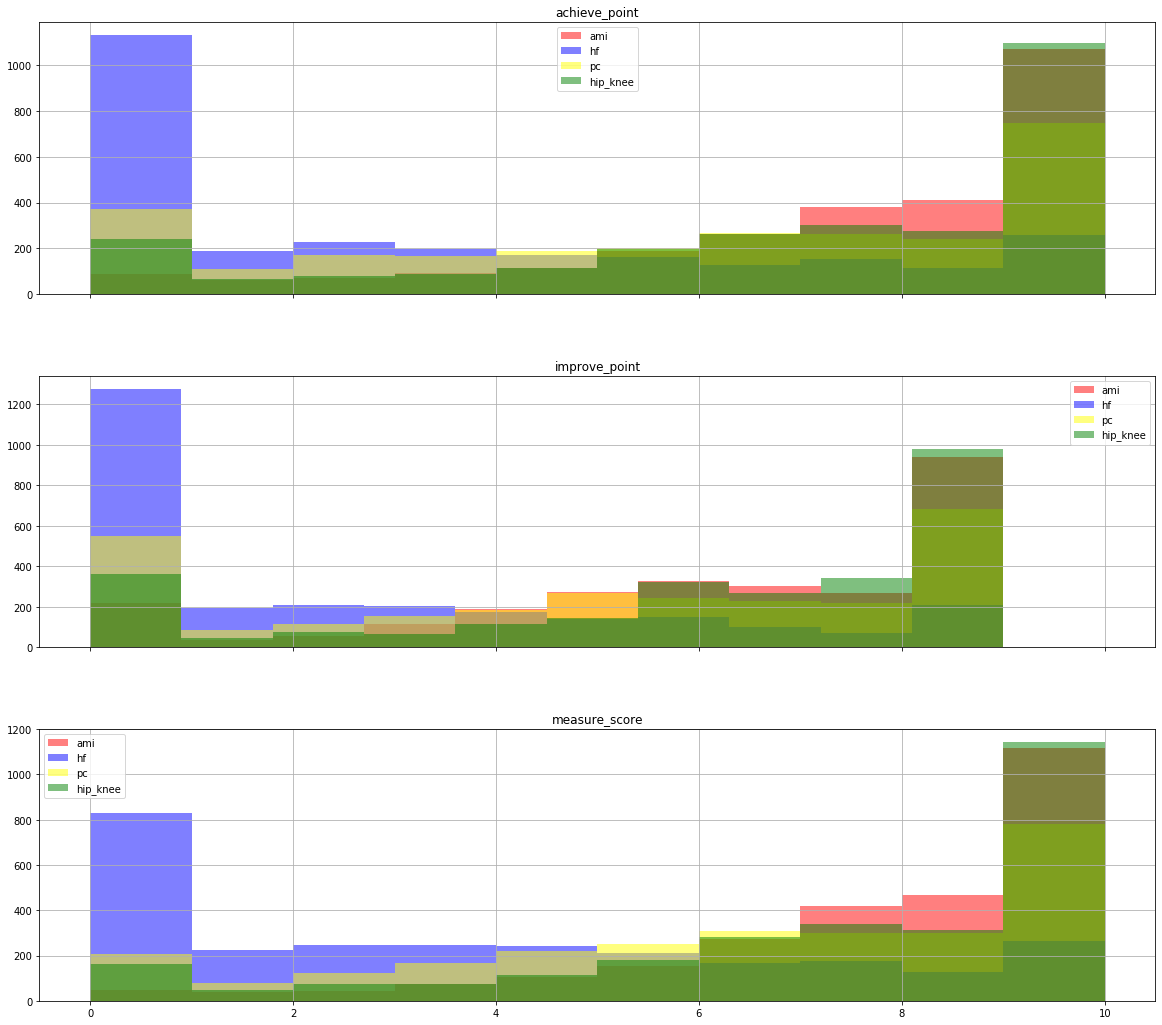

In [11]:
# Bin size = 10
# Total plots are 3 i.e 1 each for achievement points, improvement points and measure 
figure, ax = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(20, 18))
n = 3
labels= ["ami","hf", "pc", "hip_knee"]
for j in range(n):
    hvbp_df_m.hist(column=hvbp_df_m.columns[j], bins=10, ax=ax[j], alpha=0.5, color='red')
    hvbp_df_m.hist(column=hvbp_df_m.columns[j+n], bins=10, ax=ax[j], alpha=0.5, color='blue')
    hvbp_df_m.hist(column=hvbp_df_m.columns[j+(2*n)], bins=10, ax=ax[j], alpha=0.5, color='yellow')
    hvbp_df_m.hist(column=hvbp_df_m.columns[j+(3*n)], bins=10, ax=ax[j], alpha=0.5, color='green')
    ax[j].set_title(hvbp_df_m.columns[j][:13])
    ax[j].legend(labels = labels)

#### It can be inferred that mostly hf and hip_knee  either have a very low score or very high score.

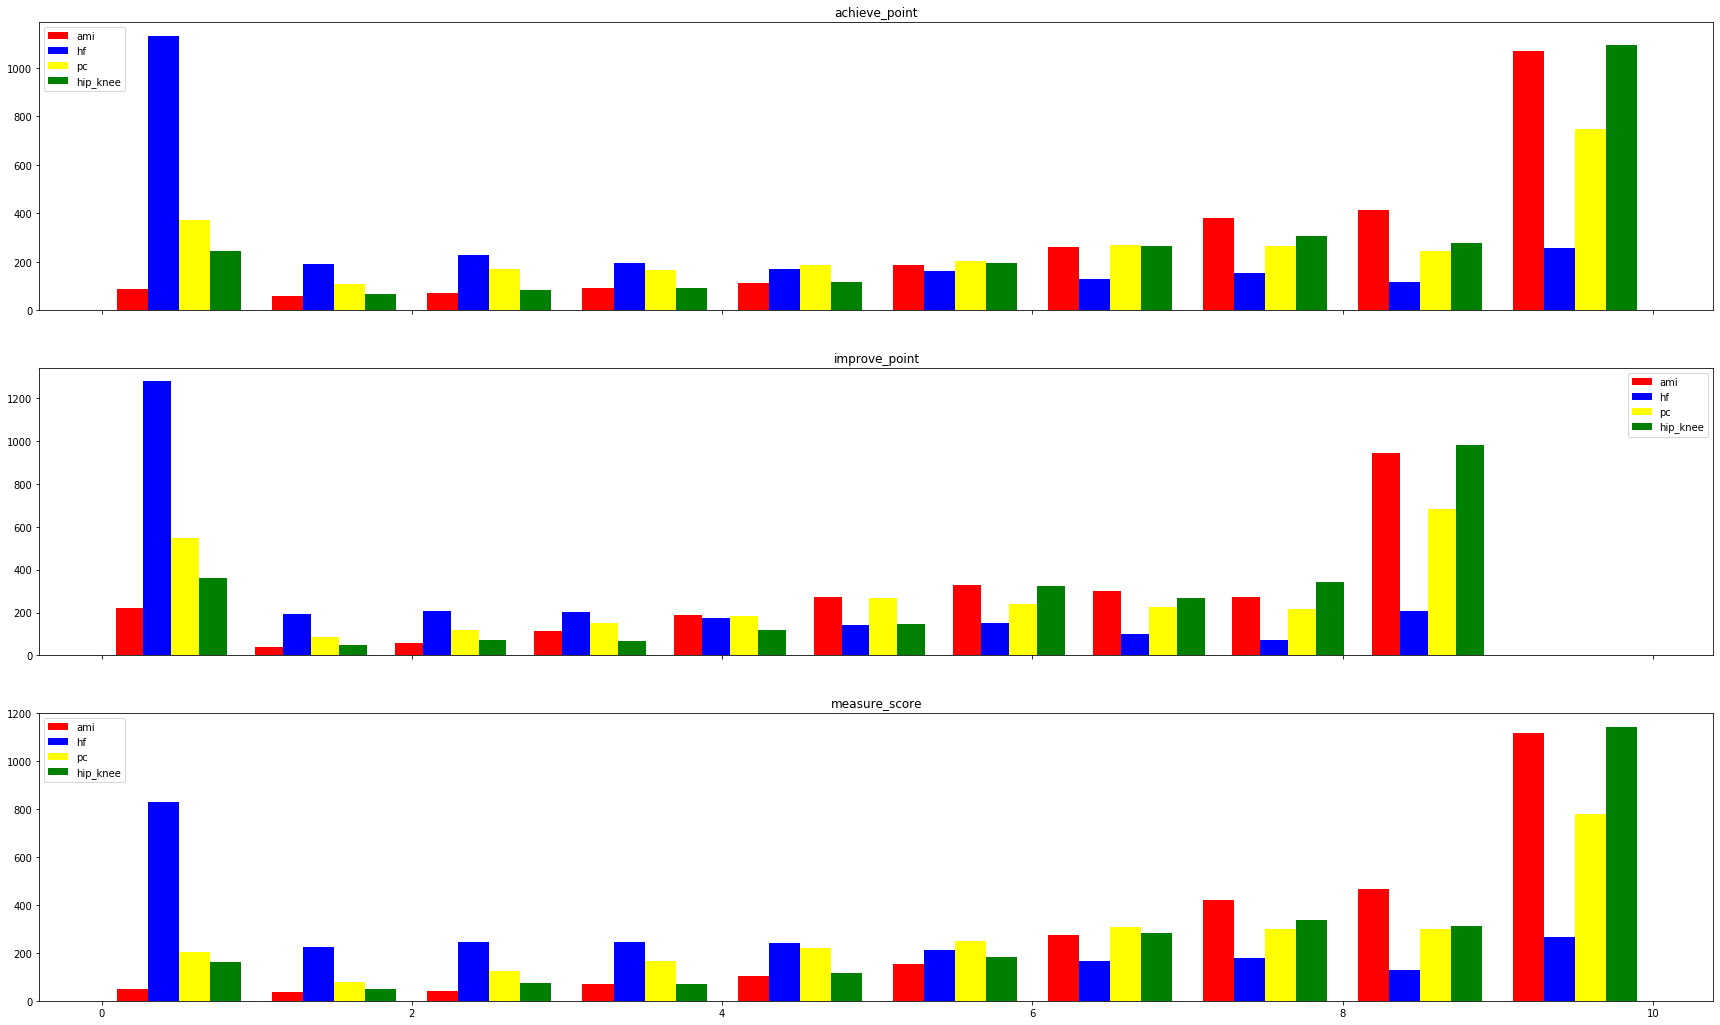

In [12]:
figure, ax = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(30, 18))

n = 3
colors = ['red', 'blue','yellow','green']


axes = ax.flatten()
for i,j in zip(range(n), axes):
    j.hist([hvbp_df_m.iloc[:,i], hvbp_df_m.iloc[:,i+n],hvbp_df_m.iloc[:,i+(2*n)],hvbp_df_m.iloc[:,i+(3*n)]], bins=10, color=colors)
    j.set_title(hvbp_df_m.columns[i][:13])
    j.legend(labels = labels)

#### It can be inferred that most of these medical conditions predominantly either have a very low score or very high score.

iii) Creating map and adding hospitals as markers with all details

In [13]:
# creating a new data frame with hospital name, lat, long and measure scores for map
features_map = ['hospital_name',
            'mort_30_ami_measure_score',
            'mort_30_hf_measure_score',
            'mort_30_pn_measure_score',
            'comp_hip_knee_measure_score',
            'latitude','longitude']
hvbp_df_map = hvbp_df[features_map]
hvbp_df_map['label'] = "<b>Hospital name</b> : " + hvbp_df_map['hospital_name'] + "<br><b>ami score</b> : " + hvbp_df_map['mort_30_ami_measure_score'].map(str) +  "<br><b>hf score</b> : " + hvbp_df_map['mort_30_hf_measure_score'].map(str) +  "<br><b>pn score</b> : " + hvbp_df_map['mort_30_pn_measure_score'].map(str) +  "<br><b>Comp hip Knee score</b> : " + hvbp_df_map['comp_hip_knee_measure_score'].map(str)
hvbp_df_map=hvbp_df_map.fillna(0)
indexNames = hvbp_df_map[ hvbp_df_map['latitude'] == 0 ].index
# Delete these row indexes from dataFrame
hvbp_df_map.drop(indexNames)
hvbp_df_map.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,hospital_name,mort_30_ami_measure_score,mort_30_hf_measure_score,mort_30_pn_measure_score,comp_hip_knee_measure_score,latitude,longitude,label
0,GROSSMONT HOSPITAL,8,10,9,10,32.779435,-117.009178,<b>Hospital name</b> : GROSSMONT HOSPITAL<br><...
1,WHITE MEMORIAL MEDICAL CENTER,10,9,10,10,0.000000,0.000000,<b>Hospital name</b> : WHITE MEMORIAL MEDICAL ...
2,HOAG MEMORIAL HOSPITAL PRESBYTERIAN,10,10,10,7,0.000000,0.000000,<b>Hospital name</b> : HOAG MEMORIAL HOSPITAL ...
3,"PARKVIEW MEDICAL CENTER, INC",1,5,8,0,38.281678,-104.612123,<b>Hospital name</b> : PARKVIEW MEDICAL CENTER...
4,COMMUNITY HOSPITAL NORTH,5,3,3,2,39.900033,-86.043072,<b>Hospital name</b> : COMMUNITY HOSPITAL NORT...


In [14]:
# creating map instance
map = folium.Map(location=[37.77, -100.42], zoom_start=4, tiles='Stamen Terrain')

# instantiate a mark cluster object for the incidents in the dataframe
markers_C = plugins.MarkerCluster().add_to(map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label in zip(hvbp_df_map.latitude, hvbp_df_map.longitude, hvbp_df_map.label):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=folium.Popup(label,max_width=500),
    ).add_to(markers_C)

# display map
map


#### It gives a high level idea of geographic distribution of hospitals registered in this program